# I.
Generate a random adjacency matrix for a simple undirected unweighted graph
with 100 vertices and 200 edges (note that the matrix should be symmetric and
contain only 0s and 1s as elements). Transfer the matrix into an adjacency list.
Visualize the graph and print several rows of the adjacency matrix and the
adjacency list. Which purposes is each representation more convenient for?

In [100]:
import networkx as nets
from networkx.generators.random_graphs import *
n = 100
p = 200
g = gnm_random_graph(n, p)
matrix = nets.adjacency_matrix(g).todense()

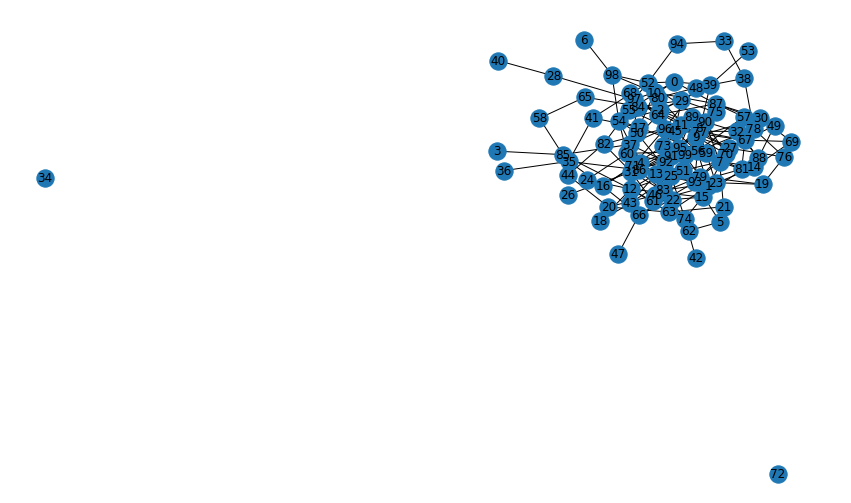

In [101]:
import numpy as np
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(15, 9))
nets.draw(g, ax=ax, with_labels=True)

In [102]:
matrix[[29, 59]]

matrix([[0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
         1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
         0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]], dtype=int32)

In [121]:
g.adj[29], g.adj[59]

(AtlasView({45: {}, 75: {}, 2: {}, 84: {}}),
 AtlasView({23: {}, 17: {}, 77: {}, 81: {}}))

# II.
Use Depth-first search to find connected components of the graph and Breadthfirst
search to find a shortest path between two random vertices. Analyse the results
obtained.

In [122]:
from collections import deque
# Depth-first search
def DFS(g, start = -1):
    unvisited = set(g.nodes)
    if start == -1:
        start = unvisited.pop()
    visited = set([start])
    stack = deque()
    for v in g.neighbors(start):
        stack.append(v)
    while len(stack):
        element = stack.pop()
        visited.add(element)
        for v in g.neighbors(element):
            if v in unvisited:
                stack.append(v)
                unvisited.discard(v)
    return visited

In [123]:
DFS(g, 34)

{34}

In [108]:
DFS(g, 6)

{0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 68,
 69,
 70,
 71,
 73,
 74,
 75,
 76,
 77,
 78,
 79,
 80,
 81,
 82,
 83,
 84,
 85,
 86,
 87,
 88,
 89,
 90,
 91,
 92,
 93,
 94,
 95,
 96,
 97,
 98,
 99}

In [116]:
# Breadthfirst search
def BFS_path(g, start, goal):
    visited = set([start])
    queue = deque()
    current_path = [start]
#     return if start and goal are connected
    if goal in g.neighbors(start):
        return [start, goal], 1
    for v in g.neighbors(start):
        queue.append(current_path+[v])
        visited.add(v)
    
    while len(queue):
        current_path = queue.popleft()
        current_node = current_path[-1]
#         check if done
        if goal in g.neighbors(current_path[-1]):
            return current_path+[goal], len(current_path)
    
        for v in g.neighbors(current_path[-1]):
            if v not in visited:
                queue.append(current_path+[v])
                visited.add(v)
                
    return -1
    
BFS_path(g, 42, 94)

([42, 74, 25, 45, 90, 52, 94], 6)

In [119]:
nets.shortest_path(g, source=42, target=94)

[42, 74, 25, 45, 90, 52, 94]

In [134]:
for i in range(7):
    source, taerget = np.random.randint(100), np.random.randint(100)
    custom = BFS_path(g, source, taerget)
    prof = nets.shortest_path(g, source, taerget)
    print(custom[1], len(prof)-1)

3 3
3 3
3 3
3 3
5 5
2 2
2 2


# III.
Describe the data structures and design techniques used within the algorithms.

In [68]:
s = set(g.nodes)
v = s.pop()
s

{1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 68,
 69,
 70,
 71,
 72,
 73,
 74,
 75,
 76,
 77,
 78,
 79,
 80,
 81,
 82,
 83,
 84,
 85,
 86,
 87,
 88,
 89,
 90,
 91,
 92,
 93,
 94,
 95,
 96,
 97,
 98,
 99}